In [276]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
import cv2
from PIL import Image

def show(im):
    plt.axis('off')
    plt.imshow(im)


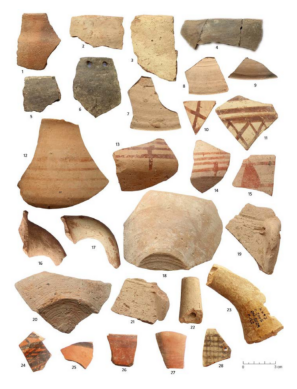

In [277]:
#sample_image = cv2.imread("piece.PNG")
#sample_image = cv2.imread("figures.jpg")
sample_image = cv2.imread("images/_original/pieces2.PNG")
#sample_image = cv2.imread("stones.jpg")

img = cv2.cvtColor(sample_image,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

show(img)

### Image Segmentation using Color Masking

In [278]:
'''
low = np.array([0, 0, 0])
high = np.array([215, 51, 51])

mask = cv2.inRange(img, low, high)

plt.axis('off')
plt.imshow(mask)
'''

"\nlow = np.array([0, 0, 0])\nhigh = np.array([215, 51, 51])\n\nmask = cv2.inRange(img, low, high)\n\nplt.axis('off')\nplt.imshow(mask)\n"

In [279]:
#result = cv2.bitwise_and(img, img, mask=mask)
#show(result)



### Image Segmentation using Otsu Thresholding

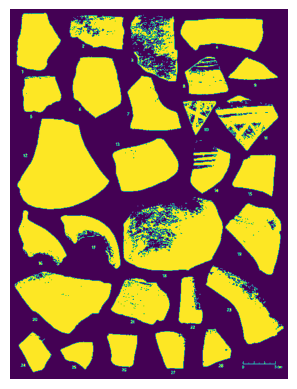

In [280]:
img_gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

thresh = threshold_otsu(img_gray)
img_otsu  = img_gray < thresh

show(img_otsu)

True

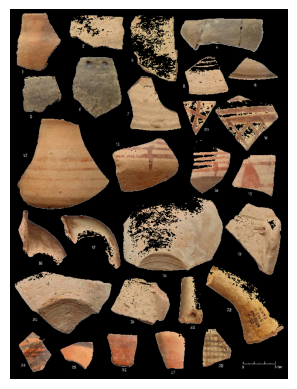

In [281]:
def filter_image(image, mask):
    r = image[:,:,0] * mask
    g = image[:,:,1] * mask
    b = image[:,:,2] * mask

    return np.dstack([r,g,b])

filteredd = filter_image(img, img_otsu)

show(filteredd)

cv2.imwrite('D:\AllProjects\VSPythonProjects\Archeological\stones_black_fon.jpg', filteredd)

### Маска исходной изобр - все кроме камней

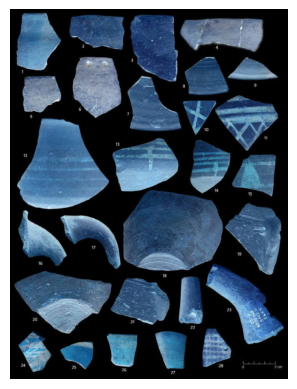

In [282]:
img_neg = cv2.bitwise_not(img)
show(img_neg)

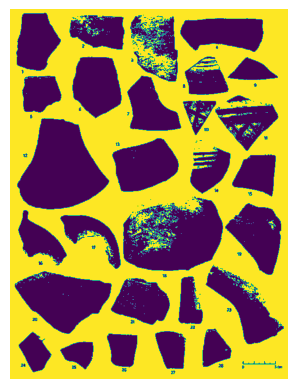

In [283]:
img_gray=cv2.cvtColor(img_neg,cv2.COLOR_RGB2GRAY)

thresh = threshold_otsu(img_gray)
img_otsu  = img_gray < thresh

show(img_otsu)

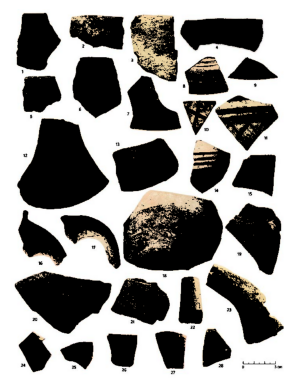

In [284]:
filteredd = filter_image(img, img_otsu)
show(filteredd)

маска - контур камней с учетом наращивания границ

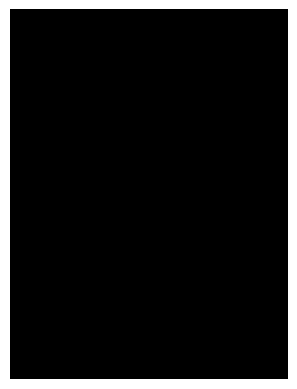

In [285]:
dilated = cv2.erode(filteredd.copy(), None, iterations=50)
show(dilated)

True

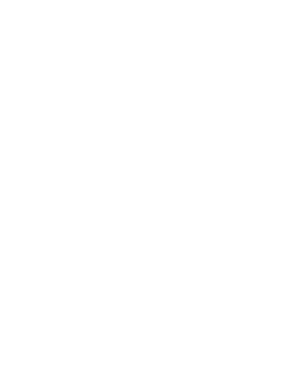

In [286]:
img_neg2 = cv2.bitwise_not(dilated)
show(img_neg2)

cv2.imwrite('D:\AllProjects\VSPythonProjects\Archeological\stones_neg.jpg', img_neg2)

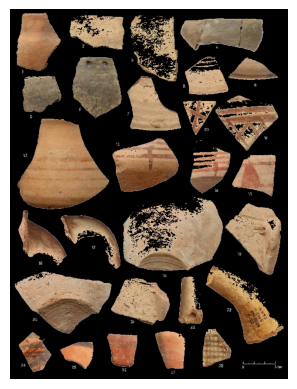

In [287]:
# using PIL

im_rgba = Image.open('stones_black_fon.jpg')
im_rgba = Image.fromarray(np.array(im_rgba)[:,:,::-1])
im_a = Image.open('stones_neg.jpg').convert('L').resize(im_rgba.size)

im_rgba.putalpha(im_a)

show(im_rgba)

нарощенная граница

###  Image Segmentation using Contour Detection

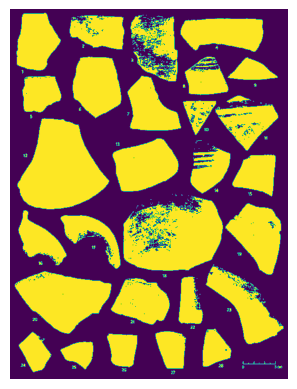

In [288]:
img = cv2.resize(img,(256,256))
img = cv2.cvtColor(sample_image,cv2.COLOR_BGR2RGB)

_,thresh = cv2.threshold(gray, np.mean(gray), 255, cv2.THRESH_BINARY_INV)

plt.axis('off')
plt.imshow(thresh)

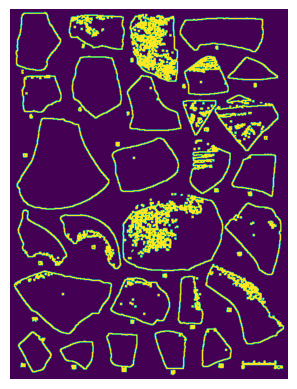

In [289]:
edges = cv2.dilate(cv2.Canny(thresh,0,255),None)

plt.axis('off')
plt.imshow(edges)

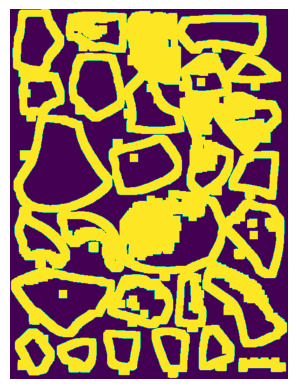

In [290]:
#gray = cv2.cvtColor(thresh,cv2.COLOR_RGB2GRAY)

dilated = cv2.dilate(edges.copy(), None, iterations=6)

plt.axis('off')
plt.imshow(dilated)

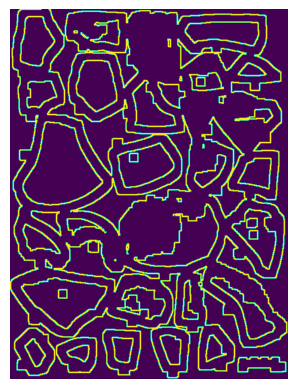

In [291]:
edgess = cv2.dilate(cv2.Canny(dilated,0,255),None)

plt.axis('off')
plt.imshow(edgess)

In [292]:
#_,thresh = cv2.threshold(dilated, np.mean(dilated), 255, cv2.THRESH_BINARY_INV)

#plt.axis('off')
#plt.imshow(thresh)

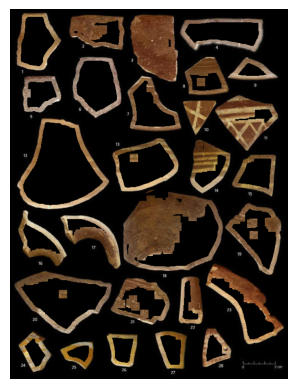

In [293]:
def filter_image(image, mask):

    r = image[:,:,0] * mask
    g = image[:,:,1] * mask
    b = image[:,:,2] * mask

    return np.dstack([r,g,b])

filtered = filter_image(img, dilated)
#filtered2 = filter_image(filtered, edges)

img = cv2.cvtColor(filtered, cv2.COLOR_BGR2RGB)

plt.axis('off')
plt.imshow(img)#filtered)

### Borders (Хрень)

In [294]:
def gaussian_blur(img, kernel=(3, 3), sigmaX=0, sigmaY=0):
    return cv2.GaussianBlur(img, kernel, sigmaX, sigmaY)

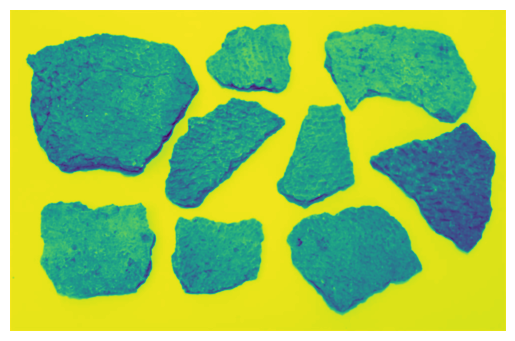

In [295]:
sample_image = cv2.imread("images/_original/stones.jpg")
img = cv2.cvtColor(sample_image,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

blurred = gaussian_blur(gray, (5, 5))
plt.axis('off')
plt.imshow(blurred)

In [296]:


def canny(image, th1=100, th2=200, apertureSize=3):
    return cv2.Canny(image, threshold1=th1, threshold2=th2, apertureSize=apertureSize)

def detect_white_region(blurred_image, kernel=(3, 3)):

    # Detect white regions
    # next, find regions in the image that are light
    squareKernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel)
    dilated = cv2.dilate(blurred, squareKernel)
    
    edge=canny(dilated)
    
    plt.axis('off')
    plt.imshow(edge)
    
    return edge

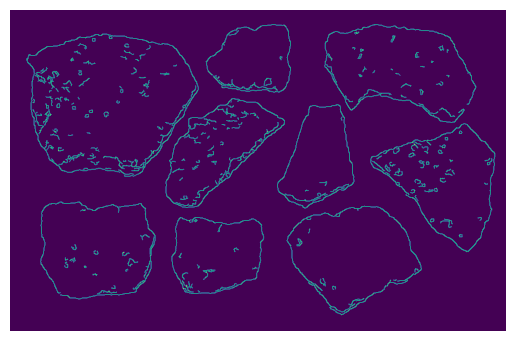

In [297]:
detect_white_region(blurred, (3,3));

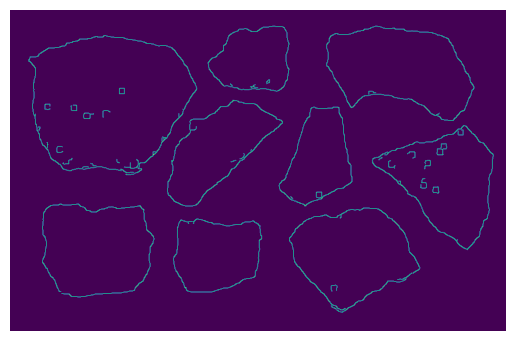

In [298]:
edged=detect_white_region(blurred, (9,9))

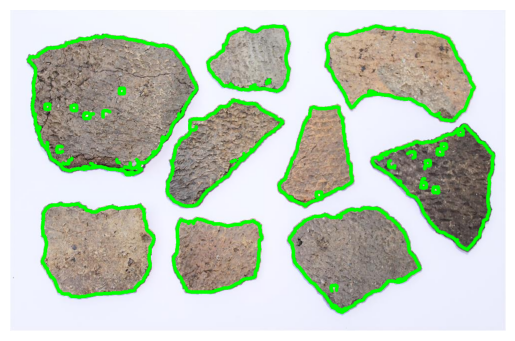

In [299]:
# Detect all contours in Canny-edged image
contours, hierarchy = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
image_with_contours = cv2.drawContours(img.copy(), contours, -1, (0,255,0), 6)
plt.axis('off')
plt.imshow(image_with_contours)